## Anomaly/Outlier Detection

Anomalies can sometimes lead to some discoveries. For example an anomalous bank withdrawal (with say multiple PIN attempts) can be an indicator of a fraudulent transaction. Or anomalous memory usage in a server station can indicate a bug.

These kinds of anomalies ned to be spotted quickly to avoid damage. Noise and anomalies are however, not the same.

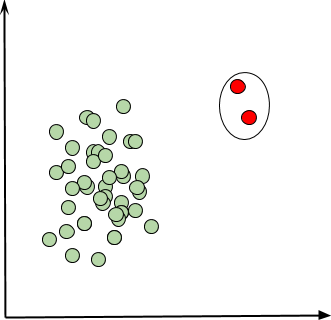

In the above data, the red dots seem to be outliers.

###Exercise 1

**Histogram based Anomaly Detection**

Is a simple classification algorithm suitable for anomaly detection? (Hint - Is accuracy the correct metric?)

Simple classification using only accuracy is often unsuitable for anomaly detection due to the inherent class imbalance where anomalies are rare. High accuracy can be achieved by simply predicting the majority class (normal), masking poor performance on anomaly detection. Anomalies are often novel and don't fit predefined class boundaries learned by standard classifiers. Therefore, specialized anomaly detection techniques and metrics focusing on the minority class are necessary for effective evaluation.

The confusion matrix looks like this

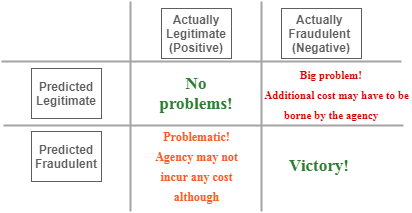

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.2 MB/s eta 0:00:00


In [ ]:
# We will first generate the data

# Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Comment out the following line if you are using Jupyter Notebook
# %matplotlib inline
# Use a predefined style set
plt.style.use('ggplot')

# Import Faker
from faker import Faker
Faker.seed(4321)
fake = Faker()

# To ensure the results are reproducible

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())

# To ensure the results are reproducible
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

# Create pandas DataFrame
salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

# Print a subsection of the DataFrame
print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [ ]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17

# Verify if the salaries were changed
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


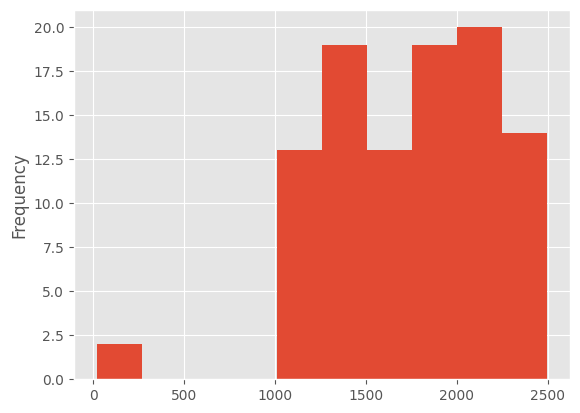

In [ ]:
# Generate a Histogram plot
salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

We can visually see the anomalies!

### Exercise 2

What is a mathematical way for anomaly detection? (Hint - Model data to be Gaussian distribution / Does the Reverse Nearest Neighbour reveal something about the anomalies?)

Estimated Mean Salary: 1741.10
Estimated Standard Deviation of Salary: 490.42
Lower Anomaly Threshold: 269.84
Upper Anomaly Threshold: 3212.36

Detected Anomalies:
                   Person  Salary (in USD)
16  Miss Amanda Harris MD               23
65           Joyce Bishop               17


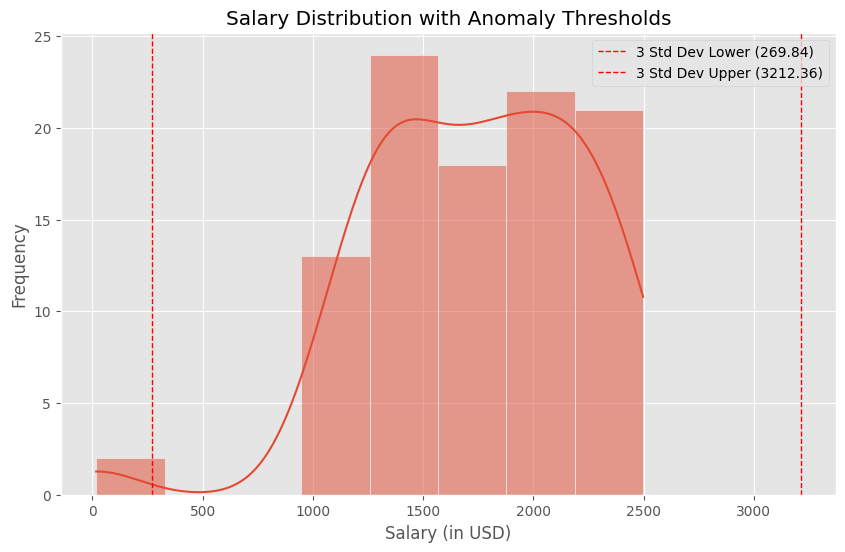

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For better visualizations

# Assume your salary_df DataFrame is already created as in the previous steps

# 1. Estimate the parameters of the Gaussian distribution
mean_salary = salary_df['Salary (in USD)'].mean()
std_salary = salary_df['Salary (in USD)'].std()

print(f"Estimated Mean Salary: {mean_salary:.2f}")
print(f"Estimated Standard Deviation of Salary: {std_salary:.2f}")

# 2. Define a threshold (e.g., based on standard deviations)
# Let's consider salaries that are more than 3 standard deviations away from the mean as anomalies
threshold = 3
lower_bound = mean_salary - threshold * std_salary
upper_bound = mean_salary + threshold * std_salary

print(f"Lower Anomaly Threshold: {lower_bound:.2f}")
print(f"Upper Anomaly Threshold: {upper_bound:.2f}")

# 3. Identify anomalies
anomalies = salary_df[(salary_df['Salary (in USD)'] < lower_bound) | (salary_df['Salary (in USD)'] > upper_bound)]

print("\nDetected Anomalies:")
print(anomalies)

# 4. Visualize the distribution with anomaly thresholds
plt.figure(figsize=(10, 6))
sns.histplot(salary_df['Salary (in USD)'], kde=True)  # kde=True adds a kernel density estimate line
plt.axvline(lower_bound, color='red', linestyle='dashed', linewidth=1, label=f'{threshold} Std Dev Lower ({lower_bound:.2f})')
plt.axvline(upper_bound, color='red', linestyle='dashed', linewidth=1, label=f'{threshold} Std Dev Upper ({upper_bound:.2f})')
plt.title('Salary Distribution with Anomaly Thresholds')
plt.xlabel('Salary (in USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Clustering based approach for anomaly detection

We have seen how clustering and anomaly detection are closely related but they serve different purposes. But clustering can be used for anomaly detection. In this approach, we start by grouping the similar kind of objects.

In [ ]:
# Convert the salary values to a numpy array
salary_raw = salary_df['Salary (in USD)'].values

# For compatibility with the SciPy implementation
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [ ]:
# Import kmeans from SciPy
from scipy.cluster.vq import kmeans

# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(salary_raw, 4)

In [ ]:
# Get the groups (clusters) and distances
from scipy.cluster.vq import vq

groups, cdist = vq(salary_raw, centroids)

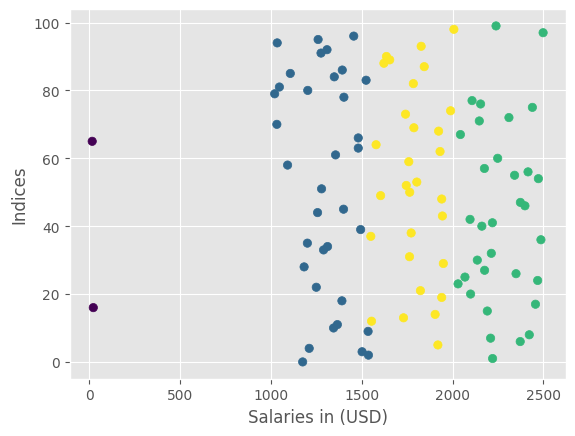

In [ ]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

## KMeans for Image Compression

As you know an image is made of mutiple pixels each of which have their color values (RGB). But what if we clustered pixels with similar color values together and replaced all pixels in a cluster by their closest color? This would highly reduce the space required to store the image.

In [ ]:
#import neccessary libraries
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
image_location = 'https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg'


Image shape = (1200, 1600, 3)


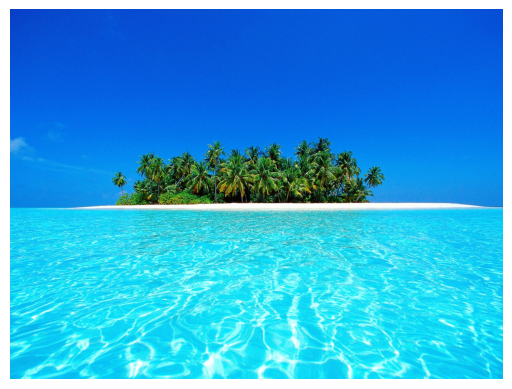

Total Pixels = 1920000
Data Sample: 


array([[  3,  57, 192],
       [  9,  63, 198],
       [ 12,  66, 201]], dtype=uint8)

In [ ]:
image = io.imread(image_location)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


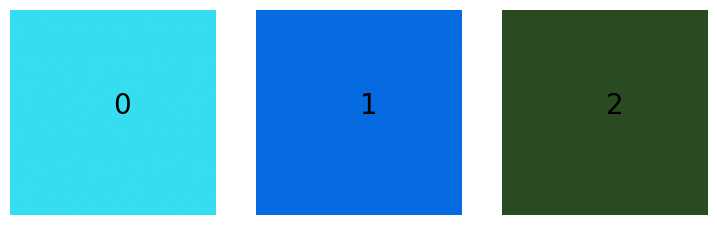

In [ ]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [ ]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

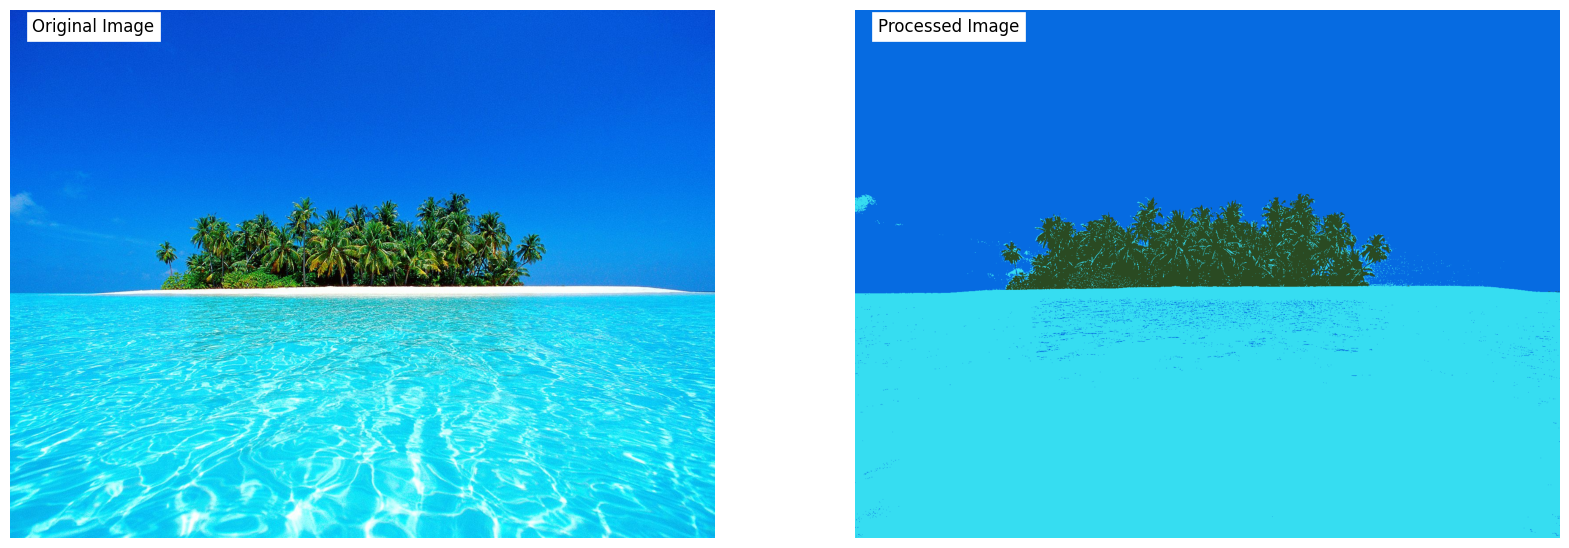

In [ ]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()

Now, we compare the effect of varying K.

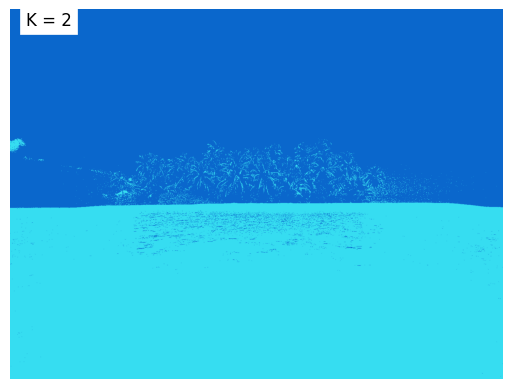

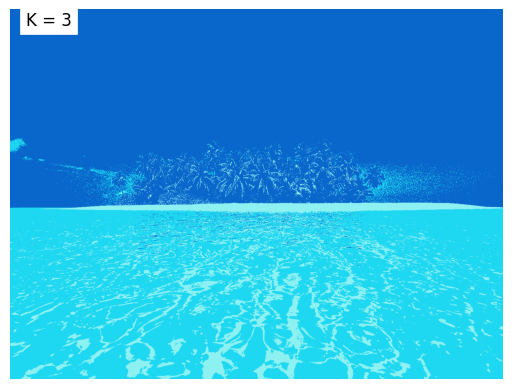

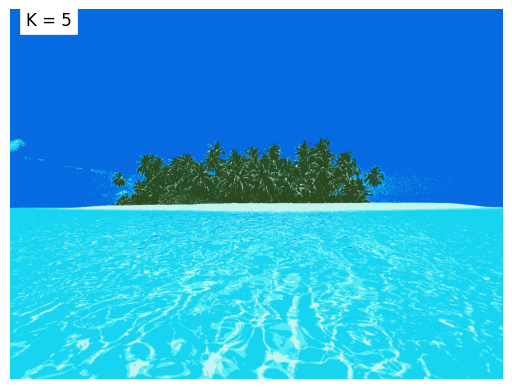

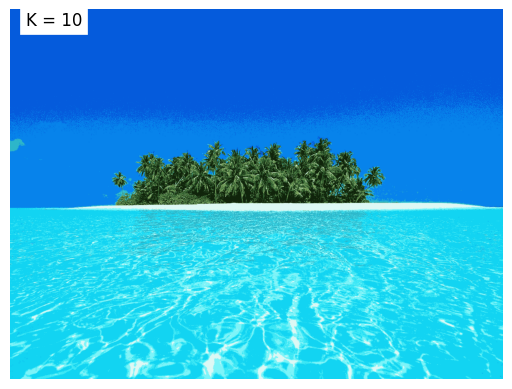

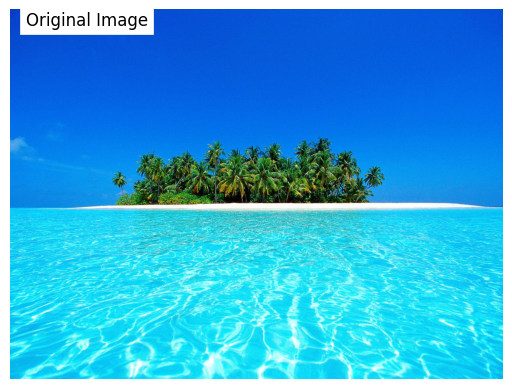

In [ ]:
K = [2, 3, 5, 10]
for k in K:

  # print("K =", k)
  #Build a clustering model on the pixels
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(all_pixels)
  kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

  image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
  for ix in range(all_pixels.shape[0]):
      image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
  image_compressed = image_compressed.reshape(image.shape)

  plt.imshow(image_compressed)
  plt.text(50,50,"K = " + str(k), fontsize=12, c = 'black', backgroundcolor = 'white')
  plt.axis(False)
  plt.show()

plt.imshow(image)
plt.text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
plt.axis(False)
plt.show()

### Exercise

* Upload your own image and play with different K values
* Figure out how do we evaluate emage compressions and implement any one of them

Image shape = (450, 800, 3)


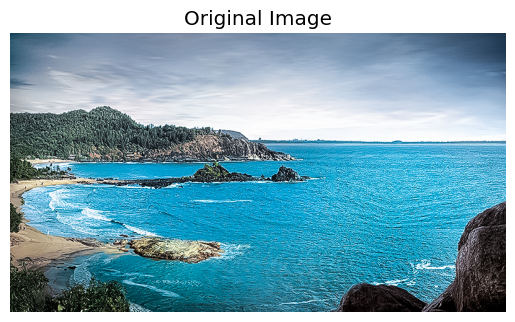

Total Pixels = 360000


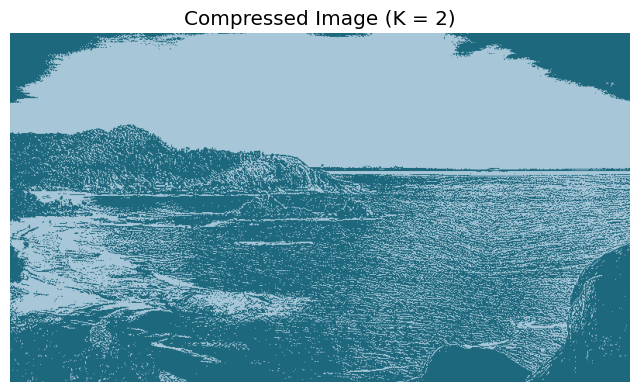

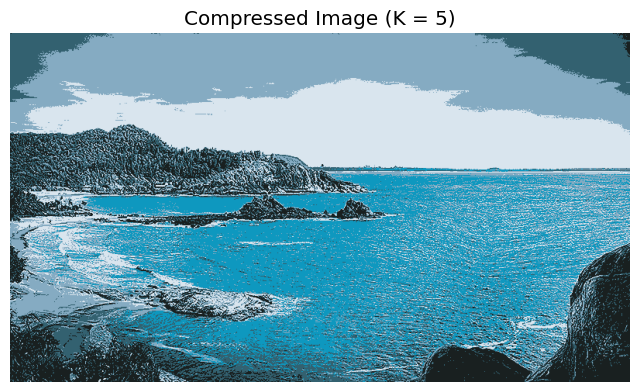

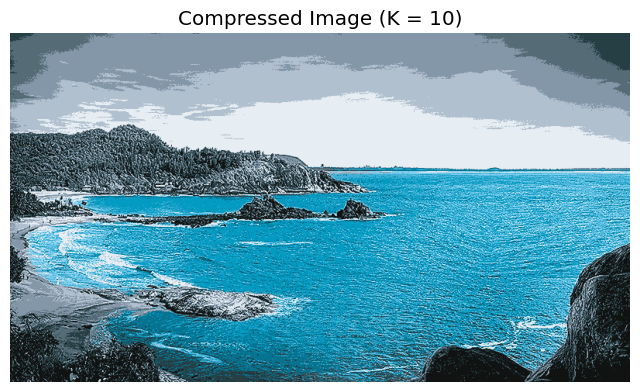

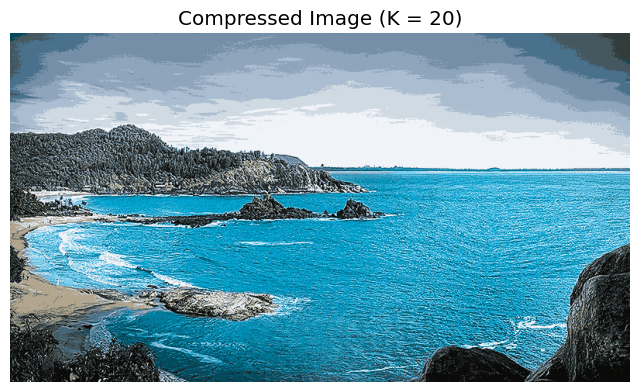

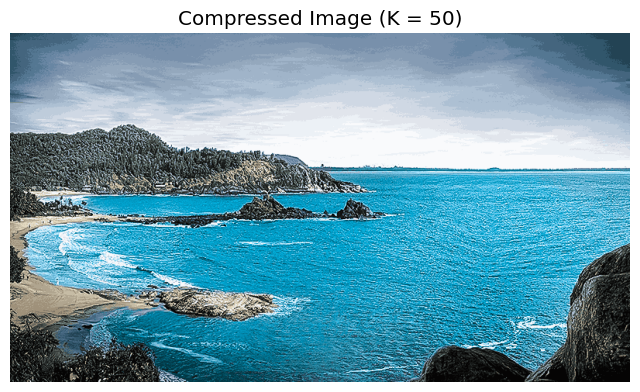

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Using Own Image
image_location = 'https://karnatakatourism.org/wp-content/uploads/2020/06/Gokarna5.jpg'

image = io.imread(image_location)

# Check image shape
print("Image shape =", image.shape)
plt.imshow(image)
plt.title("Original Image")
plt.axis(False)
plt.show()

all_pixels = image.reshape((-1, 3))
print("Total Pixels =", len(all_pixels))

K = [2, 5, 10, 20, 50]  # Experiment with different K values

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added random_state for reproducibility
    kmeans.fit(all_pixels)
    kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint8") # Using uint8 for color values

    image_compressed = kmeans_centroids[kmeans.labels_].reshape(image.shape).astype("uint8") # More efficient way to create compressed image

    plt.figure(figsize=(8, 6))
    plt.imshow(image_compressed)
    plt.title(f"Compressed Image (K = {k})")
    plt.axis(False)
    plt.show()

There are several ways to evaluate image compression. Here are a couple of common approaches:

**Compression Ratio**,
**Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR)**

##Implementing MSE and PSNR:

K = 2:
  MSE: 2196.08
  PSNR: 14.71 dB


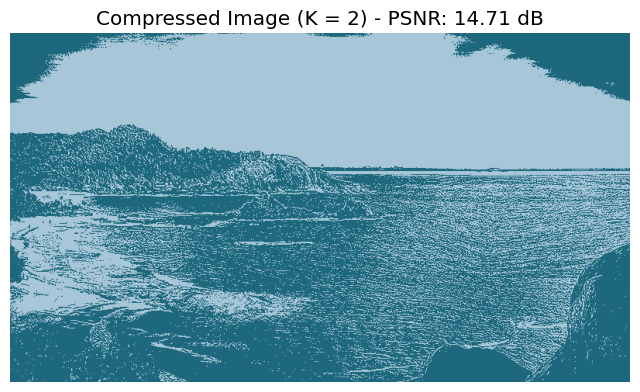

K = 5:
  MSE: 594.57
  PSNR: 20.39 dB


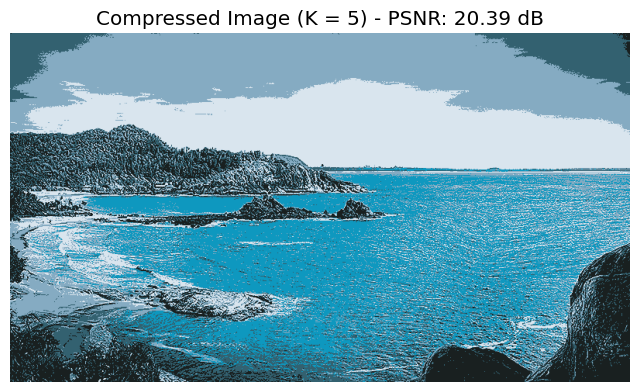

K = 10:
  MSE: 254.65
  PSNR: 24.07 dB


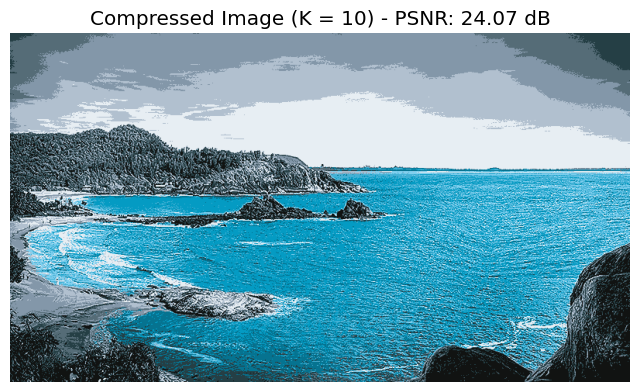

K = 20:
  MSE: 115.27
  PSNR: 27.51 dB


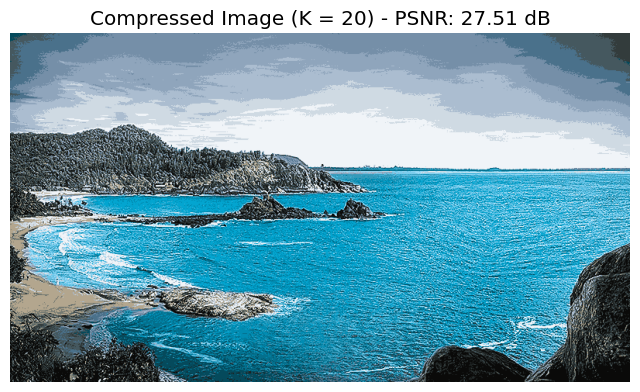

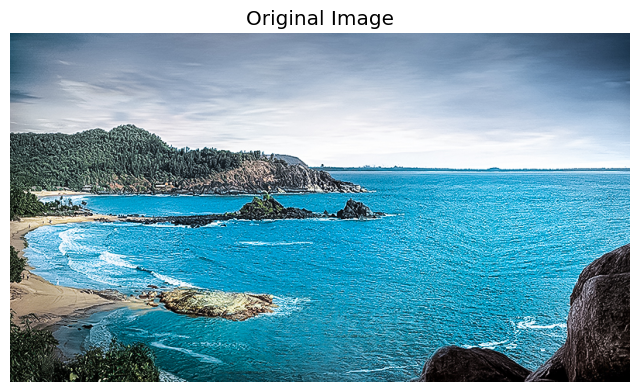

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import math

def calculate_mse(original, compressed):
    """Calculates the Mean Squared Error between two images."""
    original = original.astype(np.float64)
    compressed = compressed.astype(np.float64)
    return np.mean((original - compressed) ** 2)

def calculate_psnr(mse, max_pixel=255.0):
    """Calculates the Peak Signal-to-Noise Ratio (PSNR) in dB."""
    if mse == 0:
        return float('inf')
    return 20 * math.log10(max_pixel / math.sqrt(mse))

image_location = 'https://karnatakatourism.org/wp-content/uploads/2020/06/Gokarna5.jpg'  # Replace with your image path
image = io.imread(image_location)
all_pixels = image.reshape((-1, 3))

K_values = [2, 5, 10, 20]

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(all_pixels)
    kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint8")
    image_compressed = kmeans_centroids[kmeans.labels_].reshape(image.shape).astype("uint8")

    mse = calculate_mse(image, image_compressed)
    psnr = calculate_psnr(mse)

    print(f"K = {k}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  PSNR: {psnr:.2f} dB")

    plt.figure(figsize=(8, 6))
    plt.imshow(image_compressed)
    plt.title(f"Compressed Image (K = {k}) - PSNR: {psnr:.2f} dB")
    plt.axis(False)
    plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis(False)
plt.show()